In [61]:
import json
from PIL import Image, ImageDraw 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import pickle
import numpy as np
import shutil

## Config Directories

In [86]:
#BDD Annotation
vgRoot = 'VisualGenome/'

vgAttr = vgRoot+'Annotation/attributes.json'
vgObj = vgRoot+'Annotation/objects.json'
vgSG = vgRoot+'Annotation/scene_graphs.json'

vgExAttr = 'ExtractAttribute'
vgExRel = 'ExtractRelation'
vgGT = 'ExtractGT'
vgImg = 'VG_100K'

In [3]:
fVG = open(vgAttr)
dataAttr = json.load(fVG)
len(dataAttr)

108077

In [4]:
fVG = open(vgSG)
dataSG = json.load(fVG)
len(dataSG)

108077

In [63]:
fVG = open(vgObj)
dataObj = json.load(fVG)
len(dataObj)

108077

In [138]:
# Using readlines()
objectNorm = []
file1 = open(vgRoot+'Annotation/objectTraffic.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    objectNorm.append(line.strip().lower())
#objectNorm
objectNew = []
for item in dataAttr:
    for x in item['attributes']:
        if(x['names'][0] in objectNorm):
            objectNew.append(item['image_id'])
            break
    #break
print(len(objectNew))
objectNew = list(set(objectNew))
print(len(objectNew))

42919
42919


In [90]:
for item in objectNew:
    src = vgRoot+'VG_100K/' + str(item) + '.jpg'
    dst = vgRoot+'ImageTraffic/' + str(item) + '.jpg'
    shutil.copy(src=src, dst=dst)

In [131]:
def get_bbox_attr(object_id, objectList):
    bboxObj = None
    nameObj = None
    attr = None
    for item in objectList:
        if item['object_id'] == object_id:
            bboxObj = [item['x'], item['y'], item['w'], item['h']]
            nameObj = item['names'][0].lower()
            if 'attributes' in item.keys():
                attr = item['attributes']
            else:
                attr = ['n/a', 'n/a']
    return bboxObj, nameObj, attr

In [137]:
len(dataSG)

108077

In [141]:
predicateName = []
objectGT = []
for item in dataSG[:]:
    objectGT = []
    if(item['image_id'] in objectNew):
        objectObj = item['objects']
        for x in item['relationships'][:10]:
            if(len(x['predicate'].split(" ")) <= 2):
                bboxSub, nameSub, attrSub = get_bbox_attr(x['subject_id'], objectObj)
                bboxObj, nameObj, attrObj = get_bbox_attr(x['object_id'], objectObj)
                # print('predicate: ', x['predicate'].lower())
                # print('subject with bbox: ', bboxSub, nameSub, attrSub)
                # print('object with bbox: ', bboxObj, nameObj, attrObj)
                predicateName.append(x['predicate'].lower())
                gtDict = {
                    'predicate': x['predicate'].lower(),
                    'bbox_sub': bboxSub,
                    'bbox_obj': bboxObj,
                    'attr_sub': attrSub,
                    'attr_obj': attrObj,
                    'cls_sub': nameSub,
                    'cls_obj': nameObj,
                    'org_id_sub': x['subject_id'],
                    'org_id_obj': x['object_id'],
                }
                objectGT.append(gtDict)
        # print(item.keys())
        # print(len(item['relationships']))
        # print(len(item['objects']))
        with open(vgRoot + 'GTTraffic' +"/" + str(item['image_id'])+'.json', "w") as outfile:
            json.dump(objectGT, outfile)
    # break
print(len(predicateName))
predicateName = list(set(predicateName))
print(len(predicateName))
predicateName

380686
6100


['',
 'on traffic',
 'set to',
 'sleeping under',
 'pointing',
 'under multiple',
 'drink',
 'nursing',
 'above the',
 'slathered with',
 'going straight',
 'muzzle',
 'wearing c',
 'wall on',
 'obstructed by',
 'planted across',
 'taxiing down',
 'walking past',
 'trimmed in',
 'underneath a',
 'plane says',
 'open',
 'flipping under',
 'holding into',
 'road with',
 'rounds up',
 'reflects from',
 'wearing light',
 'held over',
 'beside',
 'on wall',
 'areound',
 'leaves',
 'wearing grey',
 'traversing',
 'helping with',
 'wiper',
 'means to',
 'paved in',
 'hit',
 'onto a',
 'ride',
 'staggered on',
 'big pink',
 'who',
 'growing next',
 'drapped across',
 'has closed',
 'on curb',
 'startled by',
 'on dark',
 'a bunch',
 'removing',
 'producing',
 'poorly',
 'drop diamond',
 'near giraffe',
 'without',
 'passenger in',
 'on right',
 'of french',
 'thin',
 'has spikey',
 'carries a',
 'formed in',
 'slammed on',
 'cuff around',
 'fender above',
 'touch',
 'got off',
 'on corner',
 '

In [101]:
check = [
        "__background__",
        "above",
        "across",
        "against",
        "along",
        "and",
        "at",
        "attached to",
        "behind",
        "belonging to",
        "between",
        "carrying",
        "covered in",
        "covering",
        "eating",
        "flying in",
        "for",
        "from",
        "growing on",
        "hanging from",
        "has",
        "holding",
        "in",
        "in front of",
        "laying on",
        "looking at",
        "lying on",
        "made of",
        "mounted on",
        "near",
        "of",
        "on",
        "on back of",
        "over",
        "painted on",
        "parked on",
        "part of",
        "playing",
        "riding",
        "says",
        "sitting on",
        "standing on",
        "to",
        "under",
        "using",
        "walking in",
        "walking on",
        "watching",
        "wearing",
        "wears",
        "with"
    ]
print(len(check))

51


In [22]:
dataItemAttr=None
for item in dataAttr:
    if(str(item['image_id']) == '116'):
       dataItemAttr = item
       print(len(dataItemAttr['attributes']))
       for x in dataItemAttr['attributes']:
           if('attributes' in x.keys()):
               if(len(x['attributes']) >= 2): 
                    print(x['attributes'][:2])
               else:
                   x['attributes'].append('None')
                   print(x['attributes'])
           else:
               x['attributes'] = ['None', 'None']
               print(x['attributes'])

58
['None', 'None']
['None', 'None']
['None', 'None']
['None', 'None']
['None', 'None']
['None', 'None']
['None', 'None']
['brick', 'None']
['None', 'None']
['None', 'None']
['None', 'None']
['None', 'None']
['None', 'None']
['None', 'None']
['None', 'None']
['None', 'None']
['short', 'None']
['None', 'None']
['white', 'None']
['None', 'None']
['white', 'large']
['None', 'None']
['None', 'None']
['black', 'None']
['orange', 'None']
['leafless', 'None']
['None', 'None']
['None', 'None']
['white', 'None']
['standing', 'None']
['black', 'None']
['standing', 'None']
['white', 'None']
['bike', 'None']
['None', 'None']
['None', 'None']
['over', 'None']
['None', 'None']
['None', 'None']
['blue', 'None']
['None', 'None']
['None', 'None']
['white', 'None']
['None', 'None']
['bike', 'None']
['None', 'None']
['None', 'None']
['black', 'safety']
['None', 'None']
['None', 'None']
['None', 'None']
['None', 'None']
['None', 'None']
['empty', 'None']
['large', 'red']
['on', 'None']
['None', 'None']
['

In [59]:
dataObj[1272]

{'image_id': 1273,
 'objects': [{'synsets': ['blind.n.01'],
   'h': 356,
   'object_id': 1542249,
   'merged_object_ids': [],
   'names': ['blind'],
   'w': 88,
   'y': 19,
   'x': 381},
  {'synsets': ['child.n.01'],
   'h': 244,
   'object_id': 1542251,
   'merged_object_ids': [],
   'names': ['child'],
   'w': 124,
   'y': 160,
   'x': 419},
  {'synsets': ['cupboard.n.01'],
   'h': 356,
   'object_id': 1542246,
   'merged_object_ids': [],
   'names': ['closet'],
   'w': 551,
   'y': 19,
   'x': 44},
  {'synsets': ['apparel.n.01'],
   'h': 58,
   'object_id': 1542252,
   'merged_object_ids': [],
   'names': ['clothes'],
   'w': 127,
   'y': 292,
   'x': 261},
  {'synsets': ['dress.n.01'],
   'h': 181,
   'object_id': 1542244,
   'merged_object_ids': [],
   'names': ['dress'],
   'w': 183,
   'y': 222,
   'x': 89},
  {'synsets': ['girl.n.01'],
   'h': 233,
   'object_id': 1542243,
   'merged_object_ids': [],
   'names': ['girl'],
   'w': 185,
   'y': 170,
   'x': 86},
  {'synsets': ['h

In [60]:
dataItemAttr=None
for item in dataObj:
    #print(item.keys())
    if(item['image_id'] == 1273):
       print(item)
       dataItemAttr = item
       

{'image_id': 1273, 'objects': [{'synsets': ['blind.n.01'], 'h': 356, 'object_id': 1542249, 'merged_object_ids': [], 'names': ['blind'], 'w': 88, 'y': 19, 'x': 381}, {'synsets': ['child.n.01'], 'h': 244, 'object_id': 1542251, 'merged_object_ids': [], 'names': ['child'], 'w': 124, 'y': 160, 'x': 419}, {'synsets': ['cupboard.n.01'], 'h': 356, 'object_id': 1542246, 'merged_object_ids': [], 'names': ['closet'], 'w': 551, 'y': 19, 'x': 44}, {'synsets': ['apparel.n.01'], 'h': 58, 'object_id': 1542252, 'merged_object_ids': [], 'names': ['clothes'], 'w': 127, 'y': 292, 'x': 261}, {'synsets': ['dress.n.01'], 'h': 181, 'object_id': 1542244, 'merged_object_ids': [], 'names': ['dress'], 'w': 183, 'y': 222, 'x': 89}, {'synsets': ['girl.n.01'], 'h': 233, 'object_id': 1542243, 'merged_object_ids': [], 'names': ['girl'], 'w': 185, 'y': 170, 'x': 86}, {'synsets': ['hair.n.01'], 'h': 29, 'object_id': 1542247, 'merged_object_ids': [], 'names': ['hair'], 'w': 48, 'y': 159, 'x': 492}, {'synsets': ['hanger.n

In [39]:
dataItemAttr

{'image_id': 116,
 'objects': [],
 'image_url': 'https://cs.stanford.edu/people/rak248/VG_100K_2/116.jpg'}

{'object_id': 1059018, 'bbox': [168, 28, 213, 127], 'attributes': ['none']}
{'object_id': 1059017, 'bbox': [387, 136, 169, 144], 'attributes': ['white', 'puffy']}
{'object_id': 1059020, 'bbox': [195, 395, 298, 204], 'attributes': ['none']}
{'object_id': 1059019, 'bbox': [172, 455, 55, 58], 'attributes': ['white', 'small']}
{'object_id': 1059021, 'bbox': [387, 316, 84, 77], 'attributes': ['hanging', 'blue']}
{'object_id': 1059022, 'bbox': [460, 393, 38, 39], 'attributes': ['green']}
{'object_id': 3788114, 'bbox': [83, 114, 171, 157], 'attributes': ['white']}
{'object_id': 1059023, 'bbox': [373, 373, 29, 27], 'attributes': ['far']}
{'object_id': 1059024, 'bbox': [535, 407, 67, 54], 'attributes': ['green']}


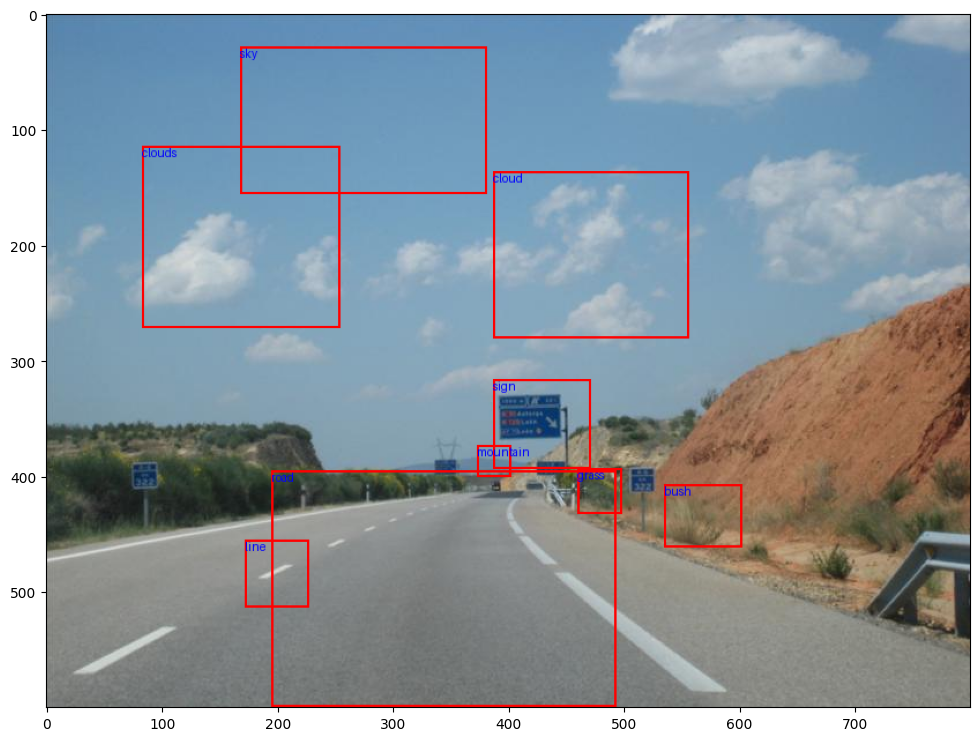

In [7]:
imCopy = image.copy()
imageDraw = ImageDraw.Draw(imCopy)
for item in dataItemAttr['attributes'][:]:
    x1, y1, x2, y2 = item['x'], item['y'], item['w'], item['h']
    #print(x1, y1, x2, y2, item['names'][0])
    t = {
        'object_id': item['object_id'], 
        #'name': object['names'][0],
        'bbox': [item['x'], item['y'], item['w'], item['h']],
        'attributes': item['attributes'] if 'attributes' in item.keys() else ['none']
    }
    print(t)
    imageDraw.rectangle([(x1, y1), (x2 + x1, y2 + y1)], outline ="red", width=2) 
    imageDraw.text((x1, y1), item['names'][0], fill='blue')
plt.figure(figsize=(16,9))
plt.imshow(imCopy)
        

In [8]:
dataItemSG = dataSG[268]
dataItemSG

{'relationships': [{'synsets': ['along.r.01'],
   'predicate': 'ON',
   'relationship_id': 3726079,
   'object_id': 1634836,
   'subject_id': 3563091},
  {'synsets': ['walk.v.01'],
   'predicate': 'walking on',
   'relationship_id': 3726080,
   'object_id': 1634837,
   'subject_id': 3563092},
  {'synsets': ['have.v.01'],
   'predicate': 'holding',
   'relationship_id': 3726081,
   'object_id': 1634839,
   'subject_id': 1634838},
  {'synsets': ['along.r.01'],
   'predicate': 'ON',
   'relationship_id': 3726082,
   'object_id': 3563093,
   'subject_id': 1634838},
  {'synsets': ['in.r.01'],
   'predicate': 'IN',
   'relationship_id': 3726083,
   'object_id': 1634840,
   'subject_id': 3563094},
  {'synsets': ['park.v.01'],
   'predicate': 'parked under',
   'relationship_id': 3726084,
   'object_id': 1634841,
   'subject_id': 3563095}],
 'image_id': 269,
 'objects': [{'synsets': ['leaf.n.01'],
   'h': 147,
   'object_id': 1634834,
   'names': ['leaves'],
   'w': 185,
   'y': 22,
   'x': 19

## Build a Module for Attribute Encoder

In [9]:
attributeEncoder = []
for image in dataAttr[:]:
    for object in image['attributes']:
        if('attributes' in object.keys()):
            for item in object['attributes']:
                attributeEncoder.append(item)

attributeEncoder = list(dict.fromkeys(attributeEncoder))
attributeEncoder.append('none')
print('number of attributes: ', len(attributeEncoder))
label_encoder = LabelEncoder()
label_encoder.fit(attributeEncoder)

number of attributes:  80259


LabelEncoder()

In [10]:
ex = ['tall', 'none']
encoded_labels = label_encoder.transform(ex)
print(encoded_labels)

[69609 50852]


In [11]:
word = 'tall'
encoded_label = label_encoder.transform([word])[0]
print(f"Mã hóa của từ '{word}': {encoded_label}")
decoded_label = label_encoder.inverse_transform([encoded_label])
print(f"Nhãn '{encoded_label}' tương ứng với từ: {decoded_label[0]}")

Mã hóa của từ 'tall': 69609
Nhãn '69609' tương ứng với từ: tall


In [13]:
type(int(label_encoder.transform(['none'])[0]))

int

## Extract Attributes

In [45]:
# Extract objects and IDs
objects = []

for image in dataAttr[:8000]:
    objects = []
    for object in image['attributes']:
        #object.pop('synsets')
        objects.append(
            {
                'id': object['object_id'], 
                #'name': object['names'][0],
                'bbox': [object['x'], object['y'], object['w'], object['h']],
                #'attributes': [int(label_encoder.transform([item])[0]) for item in object['attributes']] if 'attributes' in object.keys() else [int(label_encoder.transform(['none'])[0])]
                'attributes': object['attributes'] if 'attributes' in object.keys() else ['none']
            }
        )
    with open(vgRoot + "ExtractAttribute/" + str(image['image_id']) + ".json", "w") as outfile:
        json.dump(objects, outfile)
    
## Convert to DataFrame
# df = pd.DataFrame(objects)
# # Save to CSV
# df.to_csv('visualgenome_objects.csv', index=False)

In [46]:
for item in os.listdir(vgRoot + "ExtractAttribute/")[:]:
    with open(vgRoot + "ExtractAttribute/" + item, 'r+') as f:
        jsonUpdt = []
        data = json.load(f)
        for x in data:
            x['attributes'] = [int(label_encoder.transform([att])[0]) for att in x['attributes']]
            jsonUpdt.append(x)
            #print(x)
        f.seek(0)
        json.dump(jsonUpdt, f)
        f.truncate()
        #break


In [48]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

## Extract Relations

In [8]:
def get_bbox_rel(objectRel, id):
    bbox = [[item['x'], item['y'], item['w'], item['h']] for item in objectRel if id == item['object_id']]
    return bbox

def get_attr(objectAttr, id):
    attr = [item['attributes'] for item in objectAttr if id == item['id']]
    return attr

In [9]:
for item in dataSG[:8000]:
    objectRel = item['objects']
    relItem = item['relationships']
    relObjects = []
    for xR in relItem:
        relObj = {
            'id_sub': xR['subject_id'],
            'sub_bbox': get_bbox_rel(objectRel, xR['subject_id'])[0],
            'id_obj': xR['object_id'],
            'obj_bbox' : get_bbox_rel(objectRel, xR['object_id'])[0],
            'rel' : xR['relationship_id']
        }
        relObjects.append(relObj)
        
    with open(vgRoot + "ExtractRelation/" + str(item['image_id']) + ".json", "w") as outfile:
        json.dump(relObjects, outfile)
    # print(objectRel)
    # print(relItem)

## Extract GroundTruth

In [13]:
for itemAttr, itemRel in zip(os.listdir(vgRoot+vgExAttr)[:], os.listdir(vgRoot+vgExRel)[:]):
    dataGT = []
    #print(itemAttr, itemRel)
    dataAttr = json.load(open(vgRoot+vgExAttr+'/'+itemAttr))
    dataRel = json.load(open(vgRoot+vgExRel+'/'+itemRel))
    for item in dataRel:
        attrSub = get_attr(dataAttr, item['id_sub'])[0]
        attrObj = get_attr(dataAttr, item['id_obj'])[0]
        #print(attrSub, attrObj)
        data = {
            'id_sub': item['id_sub'],
            'att_sub': attrSub,
            'sub_bbox': item['sub_bbox'],
            'id_obj': item['id_obj'],
            'att_obj': attrObj,
            'obj_bbox': item['obj_bbox'],
            'rel': item['rel']
        }
        dataGT.append(data)
        if(len(dataGT) == 18):
            with open(vgRoot + vgGT +"/" + itemAttr, "w") as outfile:
                json.dump(dataGT, outfile)
            break
    #break

In [14]:
arrLen = []
for item in os.listdir(vgRoot+vgGT)[:]:
    fVG = open(vgRoot+vgGT+'/'+item)
    dataAttr = json.load(fVG)
    #print(item, len(dataAttr))
    arrLen.append(len(dataAttr))

In [15]:
np.array(arrLen).mean()

18.0

In [16]:
for item in os.listdir(vgRoot+vgGT)[:]:
    src = vgRoot+'VG_100K/'+item.replace('.json','.jpg')
    dst = vgRoot+'ExtractImage/'+item.replace('.json','.jpg')
    shutil.copy(src=src, dst=dst)

In [ ]:
for item in os.listdir(vgRoot+vgExAttr)[:]:
    fVG = open(vgRoot+vgGT+'/'+item)
    dataAttr = json.load(fVG)
    #print(item, len(dataAttr))
    arrLen.append(len(dataAttr))

In [5]:
d = []
a = [1,2,3,4]
b = [5,6,7,8]
c = [9]
for i in range(3):
   d += [a+b+c]
    
d

[[1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [25]:
objectId = []
for item in dataObj:
    #print(len(item['objects']))
    for i in item['objects']:
        objectId.append(i['object_id'])
        #print(i['object_id'], i['names'][0])
    #break
print(len(objectId))
objectId = list(set(objectId))
print(len(objectId))

2516939
2516939
